<a href="https://colab.research.google.com/github/Witcape/finetune_stable_diffusion/blob/main/New_Finetune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install huggingface_hub
from huggingface_hub import notebook_login
notebook_login()

In [7]:
!pip install --upgrade diffusers[torch]

In [84]:
from torch import autocast
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    use_auth_token=True
).to("cuda")

prompt = "a sleek logo of a company, named 'SPARK', emblem style, our moto is 'Sparking some code to win', abstract logo, professinal, centre align, black background, the logo should resemble the name, clean"
with autocast("cuda"):
    output = pipe(prompt)
print(output.keys())


Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

odict_keys(['images', 'nsfw_content_detected'])


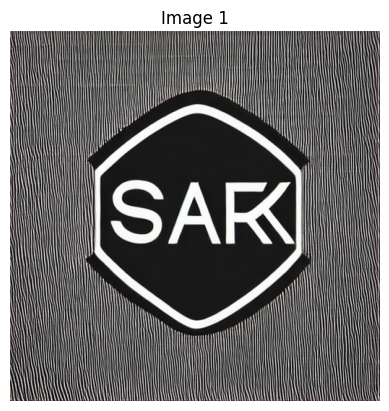

In [85]:
import matplotlib.pyplot as plt
import numpy as np
image_data = output["images"]

# If the image data is a list, assume it contains PIL images
if isinstance(image_data, list):
    for i, image in enumerate(image_data):
        # Convert PIL image to numpy array
        image_np = np.array(image)

        # Display the image using Matplotlib
        plt.imshow(image_np)
        plt.axis('off')
        plt.title(f"Image {i+1}")
        plt.show()
else:
    print("Unexpected image format. Unable to display.")